## Equations for Moment Closure of Network-based micro-model for divestment of bounded rational households.

Imports and setup

In [1]:
import sympy as s
import pickle as pkl
from sympy.abc import epsilon, phi, tau
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:98% !important; }</style>"))
s.init_printing()

Define variables and parameters for the adaptive voter model

In [2]:
# number of nodes
N = s.Symbol('N', integer=True)
# number of dirty nodes
Nd = s.Symbol('N_d', integer=True)
# number of clean nodes
Nc = s.Symbol('N_c', integer=True)
# number of edges
K = s.Symbol('K', integer=True)
# number of clean edges
cc = s.Symbol('[cc]', integer=True)
# number of dirty edges
dd = s.Symbol('[dd]', integer=True)
# number of mixed edges
cd = s.Symbol('[cd]', integer=True)
# average number of neighbors of clean nodes
kc = s.Symbol('k_c', integer=True)
# average number of neighbors of dirty nodes
kd = s.Symbol('k_d', integer=True)
# Nc - Nd
X = s.Symbol('X', real=True)
# cc - dd
Y = s.Symbol('Y', real=True)
# cd
Z = s.Symbol('Z', real=True, positive=True)
# wealth of dirty node
Wd = s.Symbol('W_d')
# wealth of clean node
Wc = s.Symbol('W_c')


Define variables and parameters for the economic subsystem:

In [3]:
P, Pc, Pd = s.symbols('P P_c P_d', positive=True, real=True)
Kc, Kd = s.symbols('K_c K_d', positive=True, real=True)
w, rc, rd = s.symbols('w r_c r_d', positive=True, real=True)
R, G, C = s.symbols('R, G, C', positive=True, real=True)
mucc, mucd, mudc, mudd = s.symbols('mu_c^c mu_c^d mu_d^c mu_d^d', positive=True, real=True)
rs, delta, pi, kappac, kappad, xi = s.symbols('s delta pi kappa_c, kappa_d xi', positive=True, rational=True, real=True)
bc, bd, bR, e, G0 = s.symbols('b_c b_d b_R e G_0', positive=True, real=True)
Xc, Xd, XR = s.symbols('X_c X_d X_R', positive=True, real=True)

Defination of relations between variables and calculation of substitution of *primitive variables* by *state variables* of the system

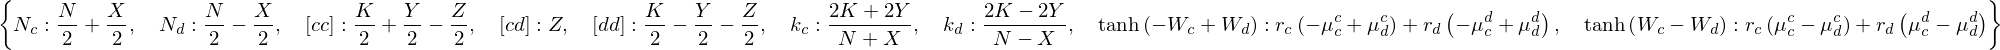

In [4]:
eqs = [
    Nd+Nc-N,
    cc+dd+cd-K,
    X-Nc+Nd,
    Y-cc+dd,
    Z-cd,
    kc-(2*cc+cd)/Nc,
    kd-(2*dd+cd)/Nd
]
vars1 = (Nc, Nd, cc, dd, cd, kc, kd)
vars2 = (N, K, X, Y, Z)
subs1 = s.solve(eqs, vars1, dict=True)[0]

# define expected wealth as expected income
subs1[s.tanh(Wd-Wc)] = rc*(mudc-mucc) + rd*(mudd-mucd)
subs1[s.tanh(Wc-Wd)] = rc*(mucc-mudc) + rd*(mucd-mudd)
subs1

Effect of events on state vector S = (X, Y, Z)

In [5]:
# regular adaptive voter events
s1 = s.Matrix([ 0, 1, -1]) # clean investor rewires
s2 = s.Matrix([ 0,-1, -1]) # dirty investor rewires
s3 = s.Matrix([-2,-kc,-1 + (1-1./kc)*((2*cc-cd)/Nc)]) # clean investor imitates c -> d
s4 = s.Matrix([ 2, kd,-1 + (1-1./kd)*((2*dd-cd)/Nd)]) # dirty investor imitates d -> c

# noise events

s5 = s.Matrix([-2,-(2*cc+cd)/Nc,(2*cc-cd)/Nc]) # c -> d
s6 = s.Matrix([ 2, (2*dd+cd)/Nd,(2*dd-cd)/Nd]) # d -> c
s7 = s.Matrix([ 0,-1, 1]) # c-c -> c-d
s8 = s.Matrix([ 0, 1,-1]) # c-d -> c-c
s9 = s.Matrix([ 0, 1, 1]) # d-d -> d-c
s10= s.Matrix([ 0,-1,-1]) # d-c -> d-d

Probabilities for events to occur:

In [6]:
p1 = (1-epsilon)*(Nc/N)*cd/(Nc * kc)*phi # clean investor rewires
p2 = (1-epsilon)*(Nd/N)*cd/(Nd * kd)*phi # dirty investor rewires
p3 = (1-epsilon)*(Nc/N)*cd/(Nc * kc)*(1-phi)*(1./2)*(s.tanh(Wd-Wc)+1) # clean investor imitates c -> d
p4 = (1-epsilon)*(Nd/N)*cd/(Nd * kd)*(1-phi)*(1./2)*(s.tanh(Wc-Wd)+1) # dirty investor imitates d -> c
p5 = epsilon * (1./2) * Nc/N # c -> d
p6 = epsilon * (1./2) * Nd/N # d -> c
p7 = epsilon * Nc/N * (2*cc)/(2*cc+cd) * Nd/N # c-c -> c-d
p8 = epsilon * Nc/N * (cd)/(2*cc+cd) * Nc/N   # c-d -> c-c
p9 = epsilon * Nd/N * (2*dd)/(2*dd+cd) * Nc/N # d-d -> d-c
p10= epsilon * Nd/N * (cd)/(2*dd+cd) * Nd/N   # d-c -> d-d

Create S and r matrices to write down rhs markov jump process for pair based proxy:

In [7]:
S = s.Matrix(s1)
for i, si in enumerate([s2, s3, s4, s5, s6, s7, s8, s9, s10]):
    S = S.col_insert(i+1, si)

r = s.Matrix([p1])
for j, pj in enumerate([s.Matrix([p]) for p in[p2, p3, p4, p5, p6, p7, p8, p9, p10]]):
    r = r.col_insert(j+1, pj)

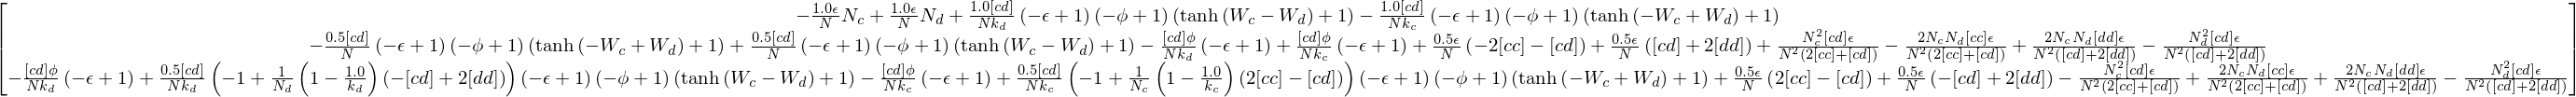

In [8]:
rhsPBP = S*s.Transpose(r)
rhsPBP

Write down right hand side for PBP and substitute primitive with system state variables:

In [9]:
rhsPBP = s.simplify(1./tau*rhsPBP.subs(subs1))

Show resulting dynamic equations for PBP

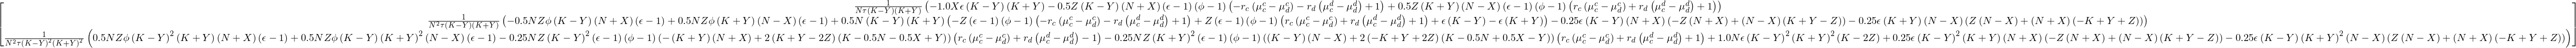

In [10]:
rhsPBP

Substitutions of rescalled quantities to allow for N -> oo limit:

In [11]:
x, y, z, k = s.symbols('x y z k')
c, g, p, g0 = s.symbols('c, g, p, g_0')
subs4 = {Kc: (N/2.*(1+x)*mucc + N/2.*(1-x)*mudc),
         Kd: (N/2.*(1+x)*mucd + N/2.*(1-x)*mudd),
         C: N * c,
         P: N * p,
         G: N * g,
         G0: N * g0,
         X: N*x,
         Y: N*k*y,
         Z: N*k*z,
         K: N*k}

Substitutute solutions to algebraic constraints of economic system (market clearing for labor and expressions for capital rent and resource flow)

In [12]:
subs3 = {Xc: (bc*Kc**kappac * C**xi)**(1./(1-pi)),
         Xd: (bd*Kd**kappad)**(1./(1-pi)),
         XR: (1.-bR/e*(G0/G)**2)**(1./(1-pi))}

In [13]:
subs2 = {w: pi * P**(pi-1) * (Xc + Xd*XR)**(1-pi),
        rc: kappac/Kc*Xc*P**pi*(Xc + Xd*XR)**(-pi),
        rd: kappad/Kd*Xd*XR*P**pi*(Xc + Xd*XR)**(-pi),
        R:  bd/e*Kd**kappad*P**pi*(Xd*XR/(Xc + Xd*XR))**pi,
        Pc: P*Xc/(Xc + Xd*XR),
        Pd: P*Xd*XR/(Xc + Xd*XR),
        s.tanh(Wd-Wc): rc*(mudc-mucc) + rd*(mudd-mucd),
        s.tanh(Wc-Wd): rc*(mucc-mudc) + rd*(mucd-mudd)}

Substitutions to ensure constant returns to scale:

In [14]:
subs5 = {kappac: 1. - pi - xi,
         kappad: 1. - pi}

Write down dynamic equations for the economic subsystem in terms of means of clean and dirty capital stocks for clean and dirty households

In [15]:
rhsECO = s.Matrix([(rs*rc-delta)*mucc + rs*rd*mucd + rs*w*P/N,
                  -delta*mucd,
                  -delta*mudc,
                  rs*rc*mudc + (rs*rd-delta)*mudd + rs*w*P/N,
                  bc*Pc**pi*(Nc*mucc + Nd*mudc)**kappac * C**xi - delta*C,
                  -R])


Write down changes in means of capital stocks through agents' switching of opinions

In [16]:

dtNcd = 1./tau*Nc*(Nc/N*cd/(2*cc+cd)*(1-phi)*(1-epsilon)*1./2*(s.tanh(Wd-Wc)+1) + epsilon*1./2*Nc/N)
dtNdc = 1./tau*Nd*(Nd/N*cd/(2*dd+cd)*(1-phi)*(1-epsilon)*1./2*(s.tanh(Wc-Wd)+1) + epsilon*1./2*Nd/N)

rhsECO_switch = s.Matrix([(mudc-mucc)*dtNdc/Nc,
                         (mudd-mucd)*dtNdc/Nc,
                         (mucc-mudc)*dtNcd/Nd,
                         (mucd-mudd)*dtNcd/Nd,
                         0,
                         0])
rhsECO_switch = s.simplify(rhsECO_switch.subs(subs1))

In [17]:
rhsECO = rhsECO + rhsECO_switch

In the economic system, substitute: 
1)primitive variables for dependent variables (subs2)
2)dependent variables for system variables (subs3)

In [18]:
rhsECO = rhsECO.subs(subs1).subs(subs2).subs(subs3).subs(subs4).subs(subs5)

In the PBP rhs substitute:
dependent variables for system variables

In [19]:
rhsPBP = rhsPBP.subs(subs1).subs(subs2).subs(subs3).subs(subs4).subs(subs5)

Combine dynamic equations of economic and social subsystem:

In [20]:
rhs = s.Matrix([rhsPBP,rhsECO]).subs(subs1)

In [22]:
with open('res_raw.pkl', 'wb') as outf:
    pkl.dump(rhs, outf)

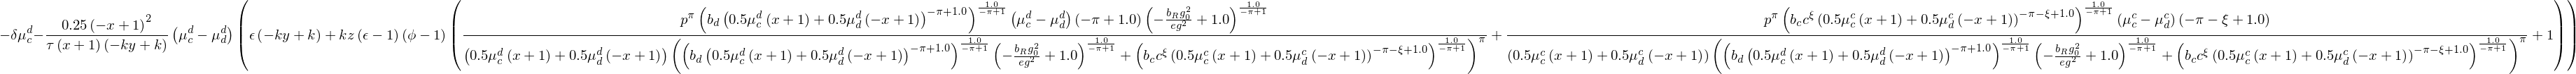

In [25]:
rhs[4].subs(N, 1)